In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
# reading the RL model span
file_name = 'models/RL_W.stan' 
file_read = open(file_name, 'r')
stan_model = file_read.read()

# reading the observed data
examples_dir = "../data/sub-036/ses-02achieva7t/sub-X73408_ses-01_task-DA_run-1_beh_20200218_11-25-08.csv"
df = pd.read_csv(examples_dir)
dfCond = df[df.block == 'Act']
# irregular responce 
resAct = dfCond['pushed'].to_numpy().astype(int)
dfCondDrop = dfCond[resAct>=0]

#set inistial data for molde span
data = {'N':int(dfCondDrop.shape[0]),     
         'pushed':np.array(dfCondDrop.pushed).astype(int),  
         'yellowChosen':np.array(dfCondDrop.yellowChosen).astype(int), 
         'winAmtPushable':np.array(dfCondDrop.winAmtPushable).astype(int), 
         'winAmtYellow':np.array(dfCondDrop.winAmtYellow).astype(int), 
         'rewarded':np.array(dfCondDrop.correctChoice).astype(int), 
         'p_push_init':.5, 
         'p_yell_init':.5}

In [72]:
subName = 'sub-036'
session = '2'
firstCond = dfCond.stimActFirst[0]

resAct = dfCond['pushed'].to_numpy().astype(int)
pushed = np.where(resAct==1)[0] + 1
pulled = np.where(resAct==0)[0] + 1
noRes  = np.where(resAct < 0)[0] + 1

corrAct= dfCond['pushCorrect']
pushCorr = np.where(corrAct==1)[0] + 1
pulledCorr = np.where(corrAct==0)[0] + 1


pltData = ({'label': ['pushed', 'push correct', 'no response', 'pull correct', 'pulled'],
            'choise': [pushed, pushCorr, noRes, pulledCorr, pulled]})
dfPlot = pd.DataFrame(pltData)

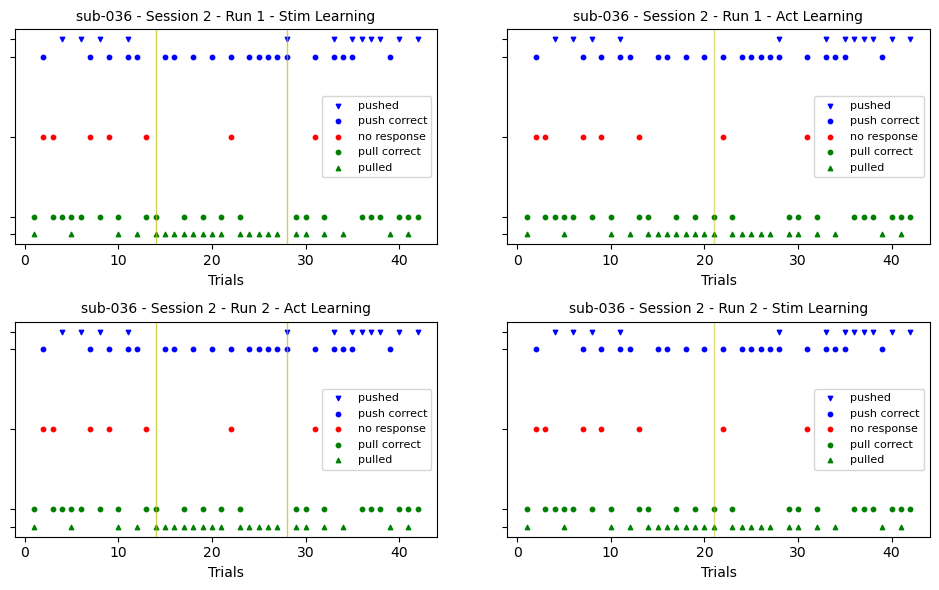

In [73]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)

columns = 2
rows = 2

y = [3.2 ,3, 2.1 , 1.2, 1] 
markers = ['v', 'o', 'o' , 'o', '^']
colors =['blue','blue', 'red', 'green', 'green']

if (firstCond == 'Act' and session == '1') or (firstCond == 'Stim' and session == '2'):
    titles = [subName + ' - Session ' + session + ' - Run 1 - Act Learning', 
              subName + ' - Session ' + session + ' - Run 1 - Stim Learning' ,
              subName + ' - Session ' + session + ' - Run 2 - Stim Learning',
              subName + ' - Session ' + session + ' - Run 2 - Act Learning']
elif (firstCond == 'Stim' and session == '1') or (firstCond == 'Act' and session == '2'):
    titles = [subName + ' - Session ' + session + ' - Run 1 - Stim Learning', 
              subName + ' - Session ' + session + ' - Run 1 - Act Learning' ,
              subName + ' - Session ' + session + ' - Run 2 - Act Learning',
              subName + ' - Session ' + session + ' - Run 2 - Stim Learning']


for idx in range(columns*rows):
    fig.add_subplot(rows, columns, idx + 1)
    #create a list of y coordinates for every x coordinate
    for i in range(len(dfPlot)):
        plt.scatter(dfPlot.choise[i],[y[i] for j in range(len(dfPlot.choise[i]))], 
                    s=10, c=colors[i], marker=markers[i])


    plt.yticks(y,[]) #show the empy y axis label
    plt.legend(dfPlot.label, fontsize=8)
    plt.xlabel('Trials', fontsize=10)
    plt.title(titles[idx], fontsize=10)
    
    if idx%2==1:
        plt.axvline(x = 21, color='y', linewidth=1, alpha=.5)
    else:
        plt.axvline(x = 14, color='y', linewidth=1, alpha=.7)
        plt.axvline(x = 28, color='y', linewidth=1, alpha=.7)

plt.subplots_adjust(wspace=10.)
plt.show()

# fig.savefig('out.png', dpi=300)

In [37]:
posterior = stan.build(stan_model, data = data)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_m_75kx4a/model_kw2hlyl5.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_m_75kx4a/model_kw2hlyl5.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_m_75kx4a/model_kw2hlyl5.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format

In [38]:
#import nest_asyncio
#nest_asyncio.apply()

In [39]:
fit = posterior.sample(num_chains=1000, num_samples=100)

Sampling:   0%
Sampling:   0% (1100/1100000)
Sampling:   0% (2200/1100000)
Sampling:   0% (3300/1100000)
Sampling:   0% (4400/1100000)
Sampling:   0% (5500/1100000)
Sampling:   1% (6600/1100000)
Sampling:   1% (7700/1100000)
Sampling:   1% (8800/1100000)
Sampling:   1% (9900/1100000)
Sampling:   1% (11000/1100000)
Sampling:   1% (12100/1100000)
Sampling:   1% (13200/1100000)
Sampling:   1% (14300/1100000)
Sampling:   1% (15400/1100000)
Sampling:   2% (16500/1100000)
Sampling:   2% (17600/1100000)
Sampling:   2% (18700/1100000)
Sampling:   2% (19800/1100000)
Sampling:   2% (20900/1100000)
Sampling:   2% (22000/1100000)
Sampling:   2% (23100/1100000)
Sampling:   2% (24200/1100000)
Sampling:   2% (25300/1100000)
Sampling:   2% (26400/1100000)
Sampling:   2% (27500/1100000)
Sampling:   3% (28600/1100000)
Sampling:   3% (29700/1100000)
Sampling:   3% (30800/1100000)
Sampling:   3% (31900/1100000)
Sampling:   3% (33000/1100000)
Sampling:   3% (34100/1100000)
Sampling:   3% (35200/1100000)
Sa

Sampling:  17% (187000/1100000)
Sampling:  17% (188100/1100000)
Sampling:  17% (189200/1100000)
Sampling:  17% (190300/1100000)
Sampling:  17% (191400/1100000)
Sampling:  18% (192500/1100000)
Sampling:  18% (193600/1100000)
Sampling:  18% (194700/1100000)
Sampling:  18% (195800/1100000)
Sampling:  18% (196900/1100000)
Sampling:  18% (198000/1100000)
Sampling:  18% (199100/1100000)
Sampling:  18% (200200/1100000)
Sampling:  18% (201300/1100000)
Sampling:  18% (202400/1100000)
Sampling:  18% (203500/1100000)
Sampling:  19% (204600/1100000)
Sampling:  19% (205700/1100000)
Sampling:  19% (206800/1100000)
Sampling:  19% (207900/1100000)
Sampling:  19% (209000/1100000)
Sampling:  19% (210100/1100000)
Sampling:  19% (211200/1100000)
Sampling:  19% (212300/1100000)
Sampling:  19% (213400/1100000)
Sampling:  20% (214500/1100000)
Sampling:  20% (215600/1100000)
Sampling:  20% (216700/1100000)
Sampling:  20% (217800/1100000)
Sampling:  20% (218900/1100000)
Sampling:  20% (220000/1100000)
Sampling

Sampling:  34% (371800/1100000)
Sampling:  34% (372900/1100000)
Sampling:  34% (374000/1100000)
Sampling:  34% (375100/1100000)
Sampling:  34% (376200/1100000)
Sampling:  34% (377300/1100000)
Sampling:  34% (378400/1100000)
Sampling:  34% (379500/1100000)
Sampling:  35% (380600/1100000)
Sampling:  35% (381700/1100000)
Sampling:  35% (382800/1100000)
Sampling:  35% (383900/1100000)
Sampling:  35% (385000/1100000)
Sampling:  35% (386100/1100000)
Sampling:  35% (387200/1100000)
Sampling:  35% (388300/1100000)
Sampling:  35% (389400/1100000)
Sampling:  36% (390500/1100000)
Sampling:  36% (391600/1100000)
Sampling:  36% (392700/1100000)
Sampling:  36% (393800/1100000)
Sampling:  36% (394900/1100000)
Sampling:  36% (396000/1100000)
Sampling:  36% (397100/1100000)
Sampling:  36% (398200/1100000)
Sampling:  36% (399300/1100000)
Sampling:  36% (400400/1100000)
Sampling:  36% (401500/1100000)
Sampling:  37% (402600/1100000)
Sampling:  37% (403700/1100000)
Sampling:  37% (404800/1100000)
Sampling

Sampling:  51% (556600/1100000)
Sampling:  51% (557700/1100000)
Sampling:  51% (558800/1100000)
Sampling:  51% (559900/1100000)
Sampling:  51% (561000/1100000)
Sampling:  51% (562100/1100000)
Sampling:  51% (563200/1100000)
Sampling:  51% (564300/1100000)
Sampling:  51% (565400/1100000)
Sampling:  52% (566500/1100000)
Sampling:  52% (567600/1100000)
Sampling:  52% (568700/1100000)
Sampling:  52% (569800/1100000)
Sampling:  52% (570900/1100000)
Sampling:  52% (572000/1100000)
Sampling:  52% (573100/1100000)
Sampling:  52% (574200/1100000)
Sampling:  52% (575300/1100000)
Sampling:  52% (576400/1100000)
Sampling:  52% (577500/1100000)
Sampling:  53% (578600/1100000)
Sampling:  53% (579700/1100000)
Sampling:  53% (580800/1100000)
Sampling:  53% (581900/1100000)
Sampling:  53% (583000/1100000)
Sampling:  53% (584100/1100000)
Sampling:  53% (585200/1100000)
Sampling:  53% (586300/1100000)
Sampling:  53% (587400/1100000)
Sampling:  54% (588500/1100000)
Sampling:  54% (589600/1100000)
Sampling

Sampling:  67% (741400/1100000)
Sampling:  68% (742500/1100000)
Sampling:  68% (743600/1100000)
Sampling:  68% (744700/1100000)
Sampling:  68% (745800/1100000)
Sampling:  68% (746900/1100000)
Sampling:  68% (748000/1100000)
Sampling:  68% (749100/1100000)
Sampling:  68% (750200/1100000)
Sampling:  68% (751300/1100000)
Sampling:  68% (752400/1100000)
Sampling:  68% (753500/1100000)
Sampling:  69% (754600/1100000)
Sampling:  69% (755700/1100000)
Sampling:  69% (756800/1100000)
Sampling:  69% (757900/1100000)
Sampling:  69% (759000/1100000)
Sampling:  69% (760100/1100000)
Sampling:  69% (761200/1100000)
Sampling:  69% (762300/1100000)
Sampling:  69% (763400/1100000)
Sampling:  70% (764500/1100000)
Sampling:  70% (765600/1100000)
Sampling:  70% (766700/1100000)
Sampling:  70% (767800/1100000)
Sampling:  70% (768900/1100000)
Sampling:  70% (770000/1100000)
Sampling:  70% (771100/1100000)
Sampling:  70% (772200/1100000)
Sampling:  70% (773300/1100000)
Sampling:  70% (774400/1100000)
Sampling

Sampling:  84% (926200/1100000)
Sampling:  84% (927300/1100000)
Sampling:  84% (928400/1100000)
Sampling:  84% (929500/1100000)
Sampling:  85% (930600/1100000)
Sampling:  85% (931700/1100000)
Sampling:  85% (932800/1100000)
Sampling:  85% (933900/1100000)
Sampling:  85% (935000/1100000)
Sampling:  85% (936100/1100000)
Sampling:  85% (937200/1100000)
Sampling:  85% (938300/1100000)
Sampling:  85% (939400/1100000)
Sampling:  86% (940500/1100000)
Sampling:  86% (941600/1100000)
Sampling:  86% (942700/1100000)
Sampling:  86% (943800/1100000)
Sampling:  86% (944900/1100000)
Sampling:  86% (946000/1100000)
Sampling:  86% (947100/1100000)
Sampling:  86% (948200/1100000)
Sampling:  86% (949300/1100000)
Sampling:  86% (950400/1100000)
Sampling:  86% (951500/1100000)
Sampling:  87% (952600/1100000)
Sampling:  87% (953700/1100000)
Sampling:  87% (954800/1100000)
Sampling:  87% (955900/1100000)
Sampling:  87% (957000/1100000)
Sampling:  87% (958100/1100000)
Sampling:  87% (959200/1100000)
Sampling

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initi

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this 

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the samp

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to colum

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expec

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this

  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If thi

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often 

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the s

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gra

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', l

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the 

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 1

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warni

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this war

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 lea

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropol

  Adjust your expectations accordingly!
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly const

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fi

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposa

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions us

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Inform

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs spo

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Inf

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the s

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this w

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rej

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occ

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.5e-05 seconds


  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probabilit

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the s

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the f

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.5e-05 seconds


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs 

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  bu

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the 

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.4e-

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occ

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If thi

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal i

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropol

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rej

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or 

    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start samp

  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rej

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 10

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropol

  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained v

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but mu

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 10

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rej

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 10

  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs spo

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/t

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  bu

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If thi

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2h

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.3e-05 seconds
  

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the s

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 98, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often 

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or 

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable type

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw2hlyl5.stan', line 102, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_u96tdv1x/model_kw

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 6.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropo

In [40]:
alphaAct_ = fit["alphaAct_"] 
alphaStim_ = fit["alphaStim_"] 
weightAct_ = fit["weightAct_"] 
beta_ = fit["beta_"] 

Text(0.5, 1.0, 'Weightening')

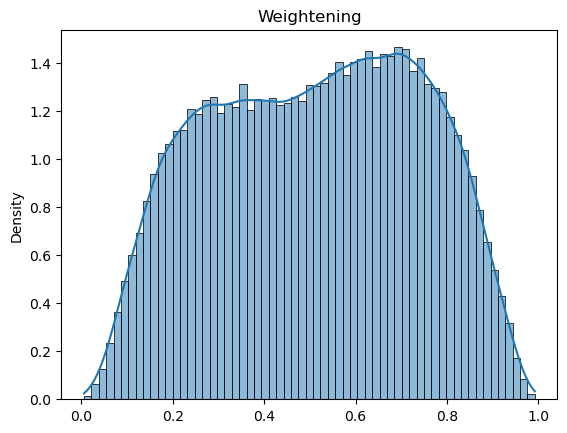

In [42]:
sns.histplot(weightAct_[0], kde=True, stat='density')
plt.title('Weightening')

In [43]:
az.summary(fit)

/mrhome/amingk/anaconda3/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (100). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alphaAct_,0.202,0.173,0.015,0.571,0.001,0.001,45565.0,60895.0,1.01
alphaStim_,0.291,0.165,0.037,0.612,0.001,0.001,52527.0,62031.0,1.01
weightAct_,0.512,0.227,0.119,0.888,0.001,0.001,43098.0,70592.0,1.02
beta_,0.120,0.041,0.049,0.197,0.000,0.000,71978.0,60274.0,1.01
p_push,0.285,0.125,0.040,0.455,0.001,0.000,45565.0,60895.0,1.01
p_pull,0.715,0.125,0.545,0.960,0.001,0.000,45565.0,60895.0,1.01
p_yell,0.411,0.056,0.289,0.451,0.000,0.000,57217.0,62031.0,1.01
p_blue,0.589,0.056,0.549,0.711,0.000,0.000,57217.0,62031.0,1.01
EV_push,20.241,8.908,2.816,32.271,0.044,0.031,45565.0,60895.0,1.01
EV_pull,20.733,3.638,15.819,27.850,0.018,0.013,45565.0,60895.0,1.01


In [33]:
az.summary(fit)

/mrhome/amingk/anaconda3/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (100). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alphaAct_,0.289,0.137,0.055,0.548,0.001,0.000,73262.0,64191.0,1.01
alphaStim_,0.297,0.167,0.022,0.592,0.001,0.000,70797.0,68025.0,1.01
weightAct_,0.537,0.183,0.206,0.871,0.001,0.000,77915.0,73466.0,1.01
beta_,0.089,0.030,0.036,0.146,0.000,0.000,81391.0,67404.0,1.01
p_push,0.578,0.034,0.512,0.646,0.000,0.000,73323.0,64191.0,1.01
p_pull,0.422,0.034,0.354,0.488,0.000,0.000,73323.0,64191.0,1.01
p_yell,0.225,0.099,0.019,0.401,0.000,0.000,70797.0,68025.0,1.01
p_blue,0.775,0.099,0.599,0.981,0.000,0.000,70797.0,68025.0,1.01
EV_push,31.206,1.833,27.644,34.882,0.007,0.005,73323.0,64191.0,1.01
EV_pull,19.417,1.561,16.286,22.451,0.006,0.004,73323.0,64191.0,1.01


In [ ]:
eta.shape

In [11]:
p_push = .3; winAmtPushable = 37
p_pull = .7; 
p_yell = .2; winAmtYellow = 63
p_blue = .8; 

weight = .3
soft_max_EV = np.zeros(4)
bet = 2

In [14]:
EV_push = p_push*winAmtPushable;
EV_pull = p_pull*(100 - winAmtPushable);
EV_yell = p_yell*winAmtYellow;
EV_blue = p_blue*(100 - winAmtYellow);

# Relative contribution of Action Value Learning verus Stimulus Value Learning
EV_push_yell = weight*EV_push + (1 - weight)*EV_yell;
EV_push_blue = weight*EV_push + (1 - weight)*EV_blue;
EV_pull_yell = weight*EV_pull + (1 - weight)*EV_yell;
EV_pull_blue = weight*EV_pull + (1 - weight)*EV_blue;

# Calculating the soft-max function ovwer weightening Action and Color conditions
soft_max_EV[0] = np.exp(bet*EV_push_yell)/(np.exp(bet*EV_push_yell) + np.exp(bet*EV_pull_blue));
soft_max_EV[1] = np.exp(bet*EV_push_blue)/(np.exp(bet*EV_push_blue) + np.exp(bet*EV_pull_yell));
soft_max_EV[2] = np.exp(bet*EV_pull_yell)/(np.exp(bet*EV_pull_yell) + np.exp(bet*EV_push_blue));
soft_max_EV[3] = np.exp(bet*EV_pull_blue)/(np.exp(bet*EV_pull_blue) + np.exp(bet*EV_push_yell));  

In [16]:
np.sum(soft_max_EV)

2.0

In [17]:
soft_max_EV

array([1.16080853e-19, 9.82013790e-01, 1.79862100e-02, 1.00000000e+00])

In [28]:
soft_max_EV[1] + soft_max_EV[2]

1.0

In [22]:
EV_pull_blue, EV_push_yell

(33.949999999999996, 12.15)

In [23]:
np.exp(bet*EV_pull_blue)

3.0803163513018654e+29

In [26]:
np.exp(bet*EV_push_yell)

35756574811.92565

In [8]:
import asyncio
pip install nest-asyncio
print(asyncio.get_event_loop().run_until_complete(asyncio.sleep(0)))

RuntimeError: This event loop is already running

In [7]:
import tornado
loop = tornado.ioloop.IOLoop.current()

In [9]:
loop